# -*- coding: utf-8 -*-
"""
Created on Tue Feb 28

@author: Kuldeep Kumar
"""

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,jaccard_score,f1_score,log_loss,confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
hr_df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
print("Look up in the data",hr_df.head())
print("Describe the Data",hr_df.describe())

Look up in the data    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockO

In [5]:
print("Shape of Data",hr_df.shape)
print("\n Null Valve in dataset ", hr_df.isnull().sum())

Shape of Data (1470, 35)

 Null Valve in dataset  Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany      

class distribution

In [6]:
print(hr_df.groupby('Attrition').size())
# Transform into binary classification
hr_df['Attrition'] = [1 if b == 'Yes' else 0 for b in hr_df.Attrition]
print("After classification Attrition distribution",hr_df.groupby('Attrition').size())

Attrition
No     1233
Yes     237
dtype: int64
After classification Attrition distribution Attrition
0    1233
1     237
dtype: int64


Convert Categorical variable into onehotencoder/dummy variables

In [7]:
hr_df['BusinessTravel'] = pd.get_dummies(hr_df['BusinessTravel'])
hr_df['Department'] = pd.get_dummies(hr_df['Department'])
hr_df['EducationField'] = pd.get_dummies(hr_df['EducationField'])
hr_df['Gender'] = pd.get_dummies(hr_df['Gender'])
hr_df['JobRole'] = pd.get_dummies(hr_df['JobRole'])
hr_df['MaritalStatus'] = pd.get_dummies(hr_df['MaritalStatus'])
hr_df['OverTime'] = pd.get_dummies(hr_df['OverTime'])
hr_df['Over18'] = pd.get_dummies(hr_df['Over18'])

In [8]:
hr_df.to_csv("Afterencoding.csv")

Split of Data

In [9]:
Y=hr_df.iloc[:,1]
X=hr_df.drop(['Attrition'],axis = 1)

Taking as nd Array

In [10]:
dataframe=X.values
X=dataframe[:,:]
Y=Y.values

In [11]:
print(X)
print(Y)

[[  41    0 1102 ...    4    0    5]
 [  49    0  279 ...    7    1    7]
 [  37    0 1373 ...    0    0    0]
 ...
 [  27    0  155 ...    2    0    3]
 [  49    0 1023 ...    6    0    8]
 [  34    0  628 ...    3    1    2]]
[1 0 1 ... 0 0 0]


In [12]:
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Test options and evaluation metric

In [13]:
num_folds = 10
seed = 7
scoring = 'accuracy'

Spot-Check Algorithms

In [14]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

evaluate each model in turn

In [15]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.840605 (0.045434)
LDA: 0.858129 (0.033068)
KNN: 0.812421 (0.053604)
CART: 0.761879 (0.034720)
NB: 0.700761 (0.068227)
SVM: 0.837683 (0.043309)


Compare Algorithms

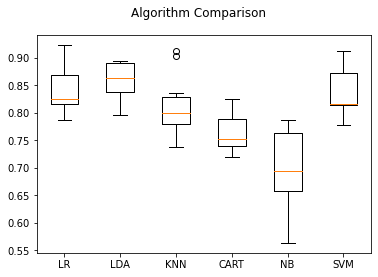

In [16]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Standardize the dataset

In [17]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [18]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.863935 (0.034505)
ScaledLDA: 0.858129 (0.033068)
ScaledKNN: 0.838683 (0.041672)
ScaledCART: 0.762907 (0.036975)
ScaledNB: 0.687112 (0.054175)
ScaledSVM: 0.852275 (0.036569)


Compare Algorithms

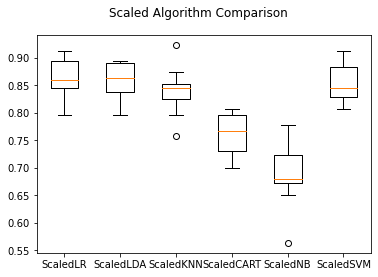

In [19]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [20]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#k_values = np.array([0.05,0.1,0.2,0.3,0.4])
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter spac
C = np.logspace(0,4,10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
model = LogisticRegression()

Create grid search using 5-fold cross validation

In [21]:
grid = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
grid_result = grid.fit(rescaledX, Y_train)
y_pred = grid_result.predict(X_validation)

In [22]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean, Standard Deviation and params %f (%f) with: %r" % (mean, stdev, param))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, Y_validation)))
print(confusion_matrix(Y_validation, y_pred))
print(classification_report(Y_validation, y_pred))
#Output after tunning is
#Best: 0.869780 using {'C': 1.0, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 1.0, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.869780 (0.003507) with: {'C': 1.0, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 2.7825594022071245, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.866862 (0.006552) with: {'C': 2.7825594022071245, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 7.742636826811269, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.866862 (0.006552) with: {'C': 7.742636826811269, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 21.544346900318832, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.866862 (0.008980) with: {'C': 21.544346900318832, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 59.94842503189409, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.866862 (0.008980) with: {'C': 59.94842503189409, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 166.81005372000593, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.866862 (0.008980) with: {'C': 166.81005372000593, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 464.15888336127773, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.866862 (0.008980) with: {'C': 464.15888336127773, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 1291.5496650148827, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.866862 (0.008980) with: {'C': 1291.5496650148827, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 3593.813663804626, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.866862 (0.008980) with: {'C': 3593.813663804626, 'penalty': 'l2'}
#mean, Standard Deviation and params nan (nan) with: {'C': 10000.0, 'penalty': 'l1'}
#mean, Standard Deviation and params 0.866862 (0.008980) with: {'C': 10000.0, 'penalty': 'l2'}

Best: 0.869780 using {'C': 1.0, 'penalty': 'l2'}
mean, Standard Deviation and params nan (nan) with: {'C': 1.0, 'penalty': 'l1'}
mean, Standard Deviation and params 0.869780 (0.003507) with: {'C': 1.0, 'penalty': 'l2'}
mean, Standard Deviation and params nan (nan) with: {'C': 2.7825594022071245, 'penalty': 'l1'}
mean, Standard Deviation and params 0.866862 (0.006552) with: {'C': 2.7825594022071245, 'penalty': 'l2'}
mean, Standard Deviation and params nan (nan) with: {'C': 7.742636826811269, 'penalty': 'l1'}
mean, Standard Deviation and params 0.866862 (0.006552) with: {'C': 7.742636826811269, 'penalty': 'l2'}
mean, Standard Deviation and params nan (nan) with: {'C': 21.544346900318832, 'penalty': 'l1'}
mean, Standard Deviation and params 0.866862 (0.008980) with: {'C': 21.544346900318832, 'penalty': 'l2'}
mean, Standard Deviation and params nan (nan) with: {'C': 59.94842503189409, 'penalty': 'l1'}
mean, Standard Deviation and params 0.866862 (0.008980) with: {'C': 59.94842503189409, 'p

Output of confusion Matrix

ccuracy 84.13%<br>
[371   0]<br>
[ 70   0]]

In [23]:
 #             precision    recall  f1-score   support
#
#           0       0.84      1.00      0.91       371
#           1       0.00      0.00      0.00        70

  accuracy                           0.84       441<br>
  macro avg       0.42      0.50      0.46       441<br>
weighted avg       0.71      0.84      0.77       441